In [290]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

data = np.genfromtxt("takashin_Homework_sample.csv", dtype=float, delimiter=',', names=True)
timestamp = data['timesecond']
scaler = preprocessing.MinMaxScaler()

# normazile data
IR = scaler.fit_transform(data['IR'])
RED = scaler.fit_transform(data['RED'])

# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

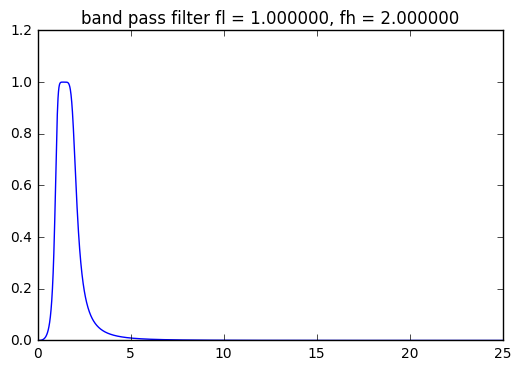

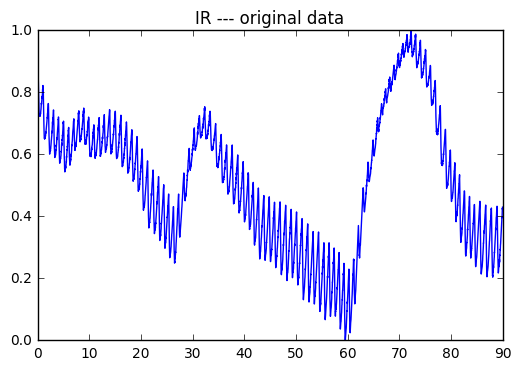

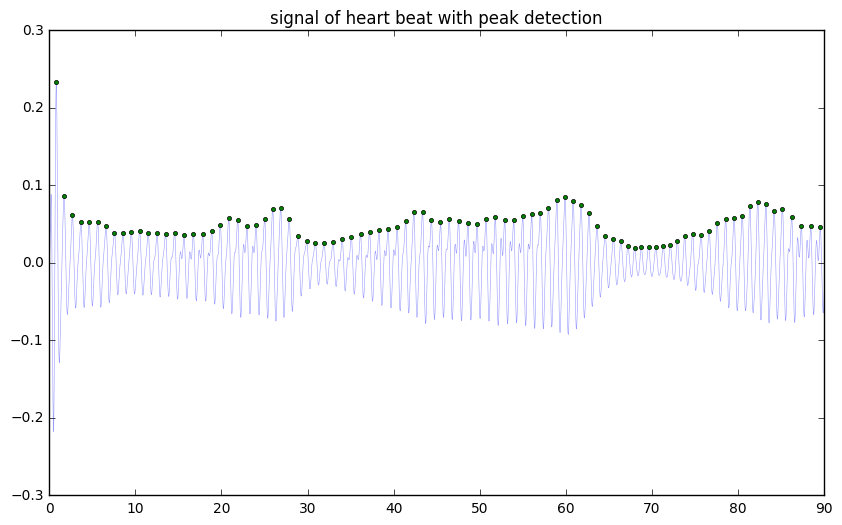

In [291]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 30
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

In [292]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))
print "the real time heart rate is: \n"
print heartRate

number of peak 91
the average heart rate is 61.288454
the real time heart rate is: 

[ 66.66666667  61.2244898   61.2244898   62.5         61.2244898
  61.2244898   61.2244898   60.          62.5         62.5         60.
  58.82352941  60.          57.69230769  54.54545455  55.55555556
  55.55555556  57.69230769  58.82352941  62.5         56.60377358
  56.60377358  56.60377358  60.          63.82978723  65.2173913
  61.2244898   58.82352941  58.82352941  60.          58.82352941
  57.69230769  56.60377358  56.60377358  55.55555556  57.69230769
  54.54545455  56.60377358  57.69230769  60.          63.82978723
  58.82352941  58.82352941  56.60377358  58.82352941  55.55555556
  54.54545455  56.60377358  58.82352941  55.55555556  54.54545455
  57.69230769  57.69230769  57.69230769  58.82352941  63.82978723
  61.2244898   63.82978723  63.82978723  65.2173913   65.2173913
  63.82978723  62.5         63.82978723  68.18181818  73.17073171
  78.94736842  76.92307692  71.42857143  71.42857143  6

[ 66.66666667  66.66666667  66.66666667 ...,  54.54545455  54.54545455
  54.54545455]


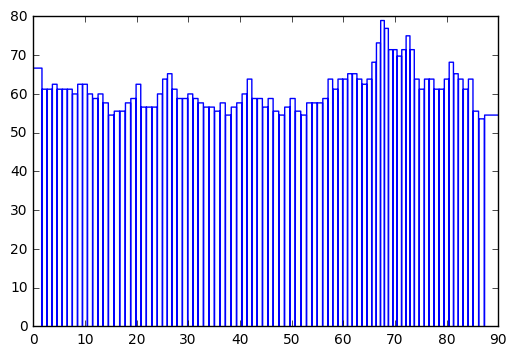

In [293]:
heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
print heartBeatArray
plt.plot(time, heartBeatArray)

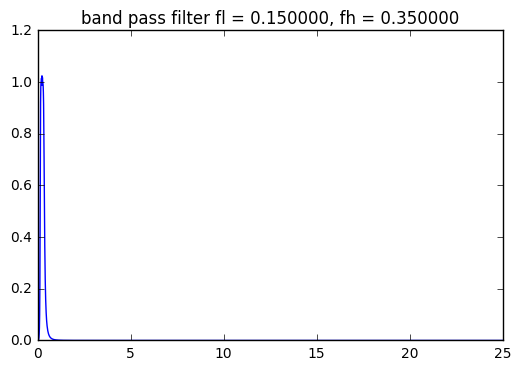

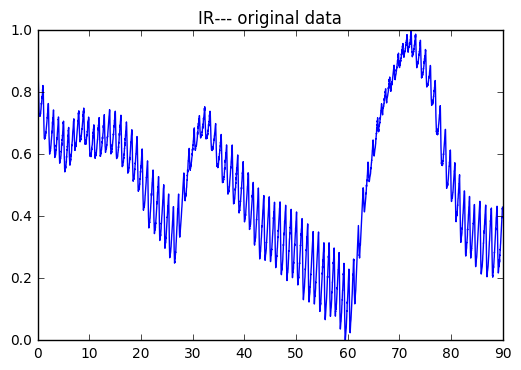

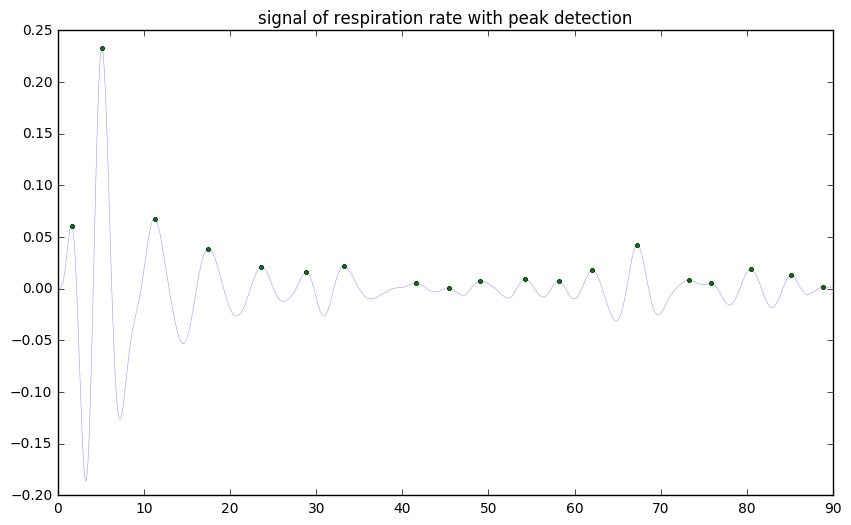

In [296]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [297]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 19
the average respiration  rate is 12.737314
the real time respiration rate is: 

[17.045454545454547, 9.8039215686274499, 9.5846645367412151, 9.7402597402597397, 11.494252873563221, 13.761467889908259, 7.2115384615384617, 15.38461538461539, 16.759776536312824, 11.538461538461547, 15.306122448979584, 15.306122448979584, 11.494252873563221, 10.033444816053505, 12.820512820512802, 12.765957446808503, 16.483516483516546]


[  79  255  561  874 1182 1443 1661 2077 2272 2451 2711 2907 3103 3364 3663
 3790 4024 4259 4441]


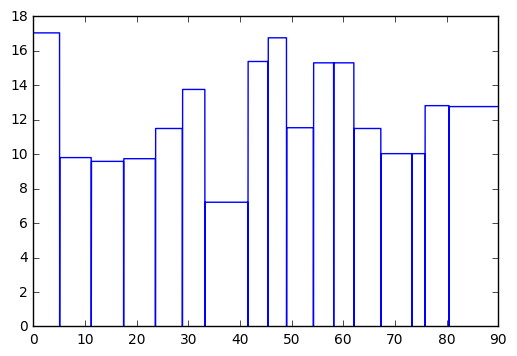

In [298]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
plt.plot(time, respirationArray)

# Calculate SPO2 

## IR signal

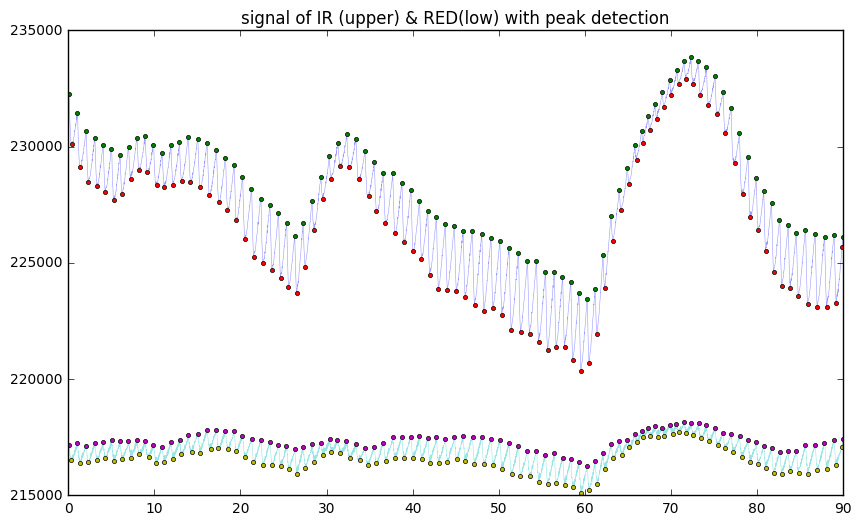

In [226]:
IROrgin = data['IR']
REDOrgin = data['RED']

time = timestamp
thres=0.05
min_dist=30
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [301]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] - data[i])/2.0
    return DC

def calculateAC(positive, negative):
    if len (positive) != len(negative):
         raise ValueError("the input data should has same dimension")
    AC = np.zeros(len(positive) - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC
    
ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))
ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 
print spo2

[ 98.9048819   99.40235251  99.66247828  99.39455255  99.58458638
  99.60149529  99.90785581  99.41621774  99.95376022  96.04954193
  99.68035189  98.75119999  99.04521762  99.93802576  98.45617099
  99.19592847  98.64963261  99.92458692  99.73749825  99.95148942
  99.91981873  99.91269152  99.7306182   99.9528097   99.80793494
  99.85950873  99.77760155  99.93193929  99.94482701  99.93068047
  99.9567097   99.93232863  97.83012304  98.57586142  98.54405787
  98.54773591  98.84279932  99.55067146  99.73570457  99.6703834
  99.46023308  99.63232327  99.88724093  99.85677244  99.87739609
  99.88708309  99.89023071  99.95555507  99.88195286  99.88242853
  99.88234723  99.95650375  99.95418406  99.81973457  99.79326198
  99.91382727  99.76235003  99.90216634  99.8733809   99.85192555
  99.8046795   99.94899658  99.9146203   99.68481293  99.95680212
  99.62495381  99.95550953  99.94995116  99.91369899  99.95680968
  98.86383226  99.77147888  99.12776172  99.60825484  98.82804713
  99.546686

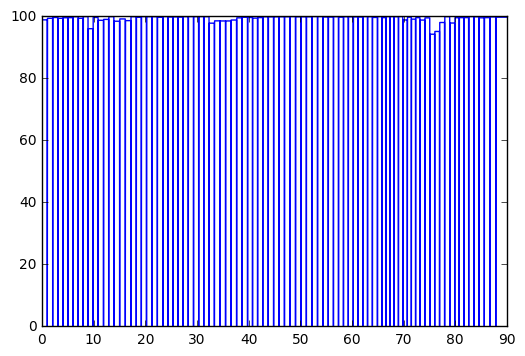

In [305]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
plt.plot(time, spo2Array)

In [308]:
saveData = np.zeros((len(IR), 5))

for i in range(len(IR)):
    saveData[i, 0] = IROrgin[i]
    saveData[i, 1] = REDOrgin[i]
    saveData[i, 2] = heartBeatArray[i]
    saveData[i, 3] = respirationArray[i]    
    saveData[i, 4] = spo2Array[i]


array([[  2.32113000e+05,   2.17148000e+05,   6.66666667e+01,
          1.70454545e+01,   9.89048819e+01],
       [  2.32098000e+05,   2.17113000e+05,   6.66666667e+01,
          1.70454545e+01,   9.89048819e+01],
       [  2.32185000e+05,   2.17115000e+05,   6.66666667e+01,
          1.70454545e+01,   9.89048819e+01],
       ..., 
       [  2.26106000e+05,   2.17250000e+05,   5.45454545e+01,
          1.27659574e+01,   9.97657738e+01],
       [  2.26062000e+05,   2.17426000e+05,   5.45454545e+01,
          1.27659574e+01,   9.97657738e+01],
       [  2.26154000e+05,   2.17332000e+05,   5.45454545e+01,
          1.27659574e+01,   9.97657738e+01]])

In [314]:
np.savetxt("temp.csv", saveData, fmt='%.4e', header="IR, RED, Heart Rate, Resoiration Rate, SPO2", delimiter=',')